## Copying model.h5 file

In [0]:
!cp drive/My\ Drive/xray/model.h5 ./
# Upload model.h5 file in the colab

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [35]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving IM-0065-0001.jpeg to IM-0065-0001.jpeg
User uploaded file "IM-0065-0001.jpeg" with length 122201 bytes


In [0]:
from keras.models import load_model
from keras import backend as keras
model = load_model('model.h5', custom_objects={'dice_coef_loss':                   
dice_coef_loss, 'dice_coef': dice_coef})

In [0]:
img_path = list(uploaded.keys())[0]

In [0]:
X_shape = 512

In [0]:
x_im = cv2.resize(cv2.imread(img_path),(X_shape,X_shape))[:,:,0]

In [0]:
op = model.predict((x_im.reshape(1, 512, 512, 1)-127.0)/127.0)

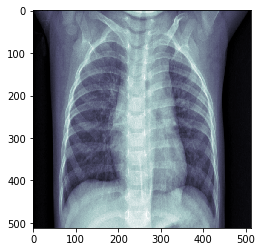

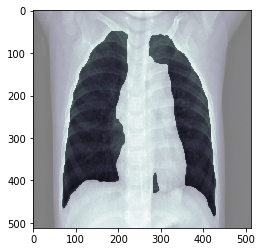

In [52]:
plt.imshow(x_im, cmap="bone", label="Input Image")
plt.show()

plt.imshow(x_im, cmap="bone", label="Output Image")
plt.imshow(op.reshape(512, 512), alpha=0.5, cmap="bone_r")
plt.show()

In [0]:
import keras

In [43]:
keras.__version__

'2.2.5'

In [53]:
cv2.__version__

'4.1.2'

In [55]:
import tensorflow
tensorflow.__version__

'1.15.0'